<a href="https://colab.research.google.com/github/Virtuosidade/Estatistica/blob/main/Indice_Gini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice de Gini

## Modulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Carregar dados

In [ ]:
dados_municipios = pd.read_csv('dados_renda_municipios.csv')

## Selecionar Estados

In [ ]:
estado_1 = 'Alagoas'
estado_2 = 'Sergipe'

In [ ]:
dados_estado_1 = dados_municipios[dados_municipios['UF'] == estado_1]
dados_estado_2 = dados_municipios[dados_municipios['UF'] == estado_2]

In [ ]:
dados_estado_1 = dados_estado_1.sort_values('RDPC').reset_index(drop=True)
dados_estado_2 = dados_estado_2.sort_values('RDPC').reset_index(drop=True)

## Construir as curvas

- Estado 1

In [ ]:
total = np.sum(dados_estado_1['RDPC'].values)

In [ ]:
p_renda_estado_1 = np.append(np.array([0]), np.cumsum(dados_estado_1['RDPC'].values)/total   )  

In [ ]:
p_familias_estado_1 = np.linspace(0, 1, len(p_renda_estado_1))

In [ ]:
df_estado_1 = pd.DataFrame({'p_familias_estado_1': p_familias_estado_1, 
                            'p_renda_estado_1':p_renda_estado_1})

- Estado 2

In [ ]:
total = np.sum(dados_estado_2['RDPC'].values)

In [ ]:
p_renda_estado_2 = np.append(np.array([0]), np.cumsum(dados_estado_2['RDPC'].values/total))

In [ ]:
p_familias_estado_2 = np.linspace(0, 1, len(p_renda_estado_2))

In [ ]:
df_estado_2 = pd.DataFrame({'p_familias_estado_2': p_familias_estado_2, 
                            'p_renda_estado_2':p_renda_estado_2})

## Curvas Brutas

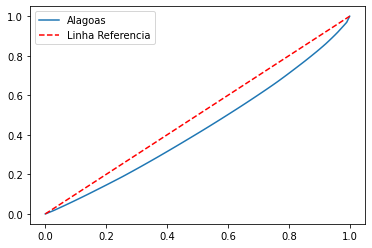

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_estado_1['p_familias_estado_1'], df_estado_1['p_renda_estado_1'], label=estado_1)
ax.plot([0, 1], [0, 1], 'r--', label='Linha Referencia')
ax.legend()

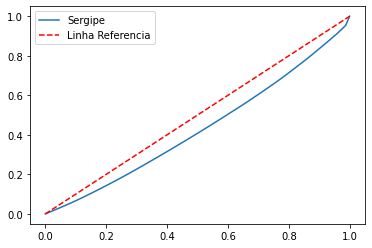

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_estado_2['p_familias_estado_2'], df_estado_2['p_renda_estado_2'], label=estado_2)
ax.plot([0, 1], [0, 1], 'r--', label='Linha Referencia')
ax.legend()

## Ajustar a curva e obter a integral

- Curva estado 1

In [ ]:
modelo_1 = sm.ols(formula= 'p_renda_estado_1 ~ p_familias_estado_1 + np.power(p_familias_estado_1, 2)', 
                  data= df_estado_1).fit()

In [ ]:
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       p_renda_estado_1   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.712e+04
Date:                Sun, 16 May 2021   Prob (F-statistic):          3.73e-165
Time:                        17:18:28   Log-Likelihood:                 374.85
No. Observations:                 103   AIC:                            -743.7
Df Residuals:                     100   BIC:                            -735.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.0042      0.002      2.244      0.027       0.000       0.008
p_familias_estado_1                  0.6382      0.009     73.824      0.000       0.621       0.655
np.power(p_familias_estado_1, 2)     0.3193      0.008     38.168      0.000       0.303       0.336
==============================================================================
Omnibus:                       77.647   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.520
Skew:                           2.332   Prob(JB):                    1.85e-145
Kurtosis:                      14.557   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_estado_1['p_renda_pred'] = modelo_1.predict(df_estado_1)

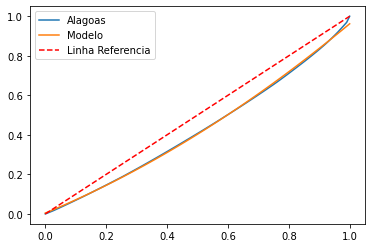

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_estado_1['p_familias_estado_1'], df_estado_1['p_renda_estado_1'], label=estado_1)
ax.plot(df_estado_1['p_familias_estado_1'], df_estado_1['p_renda_pred'], label='Modelo')
ax.plot([0, 1], [0, 1], 'r--', label='Linha Referencia')
ax.legend()

- Obter integral

In [ ]:
modelo_1.params

Intercept                           0.004197
p_familias_estado_1                 0.638235
np.power(p_familias_estado_1, 2)    0.319308
dtype: float64

In [ ]:
p_familias = sp.Symbol('PercFamilias')

In [ ]:
f_estado_1 = p_familias - 0.0042 - 0.6382*p_familias - 0.3193*p_familias**2

In [ ]:
F_estado_1 = sp.integrate(f_estado_1)
F_estado_1

-0.106433333333333*PercFamilias**3 + 0.1809*PercFamilias**2 - 0.0042*PercFamilias

In [ ]:
# transformar numa função em que operações podem ser realizadas
F_estado_1 = sp.lambdify(p_familias, F_estado_1)

- Obter o gini

In [ ]:
gini_estado1 = 2 * ( F_estado_1(1) - F_estado_1(0) )
gini_estado1

0.140533333333334

- Estado 2

In [ ]:
modelo_2 = sm.ols(formula= 'p_renda_estado_2 ~ p_familias_estado_2 + np.power(p_familias_estado_2, 2)', 
                  data= df_estado_2).fit()

In [ ]:
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       p_renda_estado_2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.398e+04
Date:                Sun, 16 May 2021   Prob (F-statistic):          3.17e-125
Time:                        17:24:47   Log-Likelihood:                 286.71
No. Observations:                  76   AIC:                            -567.4
Df Residuals:                      73   BIC:                            -560.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.0010      0.002      0.520      0.605      -0.003       0.005
p_familias_estado_2                  0.6506      0.009     73.937      0.000       0.633       0.668
np.power(p_familias_estado_2, 2)     0.3113      0.009     36.567      0.000       0.294       0.328
==============================================================================
Omnibus:                       96.618   Durbin-Watson:                   0.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1929.218
Skew:                           3.781   Prob(JB):                         0.00
Kurtosis:                      26.495   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_estado_2['p_renda_pred'] = modelo_2.predict(df_estado_2)

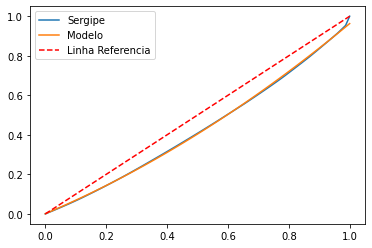

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_estado_2['p_familias_estado_2'], df_estado_2['p_renda_estado_2'], label=estado_2)
ax.plot(df_estado_2['p_familias_estado_2'], df_estado_2['p_renda_pred'], label='Modelo')
ax.plot([0, 1], [0, 1], 'r--', label='Linha Referencia')
ax.legend()

- Obter integral

In [ ]:
modelo_2.params

Intercept                           0.000989
p_familias_estado_2                 0.650586
np.power(p_familias_estado_2, 2)    0.311283
dtype: float64

In [ ]:
p_familias = sp.Symbol('PercFamilias')

In [ ]:
f_estado_2 = p_familias - 0.0010 - 0.6506*p_familias - 0.3113*p_familias**2

In [ ]:
F_estado_2 = sp.integrate(f_estado_2)
F_estado_2

-0.103766666666667*PercFamilias**3 + 0.1747*PercFamilias**2 - 0.001*PercFamilias

In [ ]:
# transformar numa função em que operações podem ser realizadas
F_estado_2 = sp.lambdify(p_familias, F_estado_2)

- Obter o gini

In [ ]:
gini_estado2 = 2 * ( F_estado_2(1) - F_estado_2(0) )
gini_estado2

0.13986666666666597

## Uso de função pronta

Implentação encontrada em: https://github.com/oliviaguest/gini/blob/master/gini.py

In [ ]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [ ]:
gini(dados_estado_1['RDPC'].values), gini_estado1

(0.14082322758568558, 0.140533333333334)

In [ ]:
gini(dados_estado_2['RDPC'].values), gini_estado2

(0.14037778786815108, 0.13986666666666597)

In [ ]:
np.cumsum([1, 2, 3])

array([1, 3, 6])

In [ ]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])